<a href="https://colab.research.google.com/github/41123222009/20P03519-Tugas-4/blob/main/Tuning_Model_Loan_Approval_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Building, Tuning, dan Deploying Model Machine Learning**

Nama  : Iksan nur Afiah\
NIM   : 4112322009\
Prodi : Statistika Terapan dan Komputasi

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, classification_report)

sns.set_style("whitegrid")

## **1. Eksplorasi Data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/41123222009/20P03519-Tugas-4/refs/heads/main/loan_approval_dataset.csv')
df

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,PhD,333,26892,Personal,0
1,46,90588,Master,316,26619,Home,1
2,32,113610,PhD,452,1281,Personal,1
3,60,117856,High School,677,28420,Personal,0
4,25,58304,PhD,641,16360,Car,0
...,...,...,...,...,...,...,...
495,37,108236,High School,455,44668,Education,1
496,41,117579,Bachelor,666,24177,Car,1
497,29,26469,PhD,550,25022,Medical,0
498,52,50105,High School,633,41761,Medical,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              500 non-null    int64 
 1   Income           500 non-null    int64 
 2   Education_Level  500 non-null    object
 3   Credit_Score     500 non-null    int64 
 4   Loan_Amount      500 non-null    int64 
 5   Loan_Purpose     500 non-null    object
 6   Loan_Approval    500 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 27.5+ KB


Dataset tersebut berisi informasi tentang persetujuan pinjaman dengan 500 entri dan 7 kolom. Berikut adalah deskripsi setiap kolom:

1. `Age` (*int64*) - Usia pemohon pinjaman.
2. `Income` (*int64*) - Pendapatan tahunan pemohon dalam satuan mata uang tertentu.
3. `Education_Level` (*object*) - Tingkat pendidikan pemohon (misalnya, High School, Master, PhD).
4. `Credit_Score` (*int64*) - Skor kredit pemohon.
5. `Loan_Amount` (*int64*) - Jumlah pinjaman yang diajukan.
6. `Loan_Purpose` (*object*) - Tujuan peminjaman (misalnya, Personal, Home, Car).
7. `Loan_Approval` (*int64*) - Status persetujuan pinjaman (0 = ditolak, 1 = disetujui).

### Identifikasi Missing Value

In [4]:
print(df.isnull().sum())

Age                0
Income             0
Education_Level    0
Credit_Score       0
Loan_Amount        0
Loan_Purpose       0
Loan_Approval      0
dtype: int64


Berdasarkan output yang ditampilkan, hasil dari perintah `df.isnull().sum()` menunjukkan bahwa tidak ada nilai yang hilang (missing values) dalam dataset. Setiap kolom, termasuk `Age`, `Income`, `Education_Level`, `Credit_Score`, `Loan_Amount`, `Loan_Purpose`, dan `Loan_Approval`, memiliki jumlah nilai kosong sebanyak 0. Ini berarti dataset bersih dan tidak memerlukan penanganan tambahan untuk mengatasi missing values.

### Visualisasi Data

#### A. Distribusi Usia Pemohon

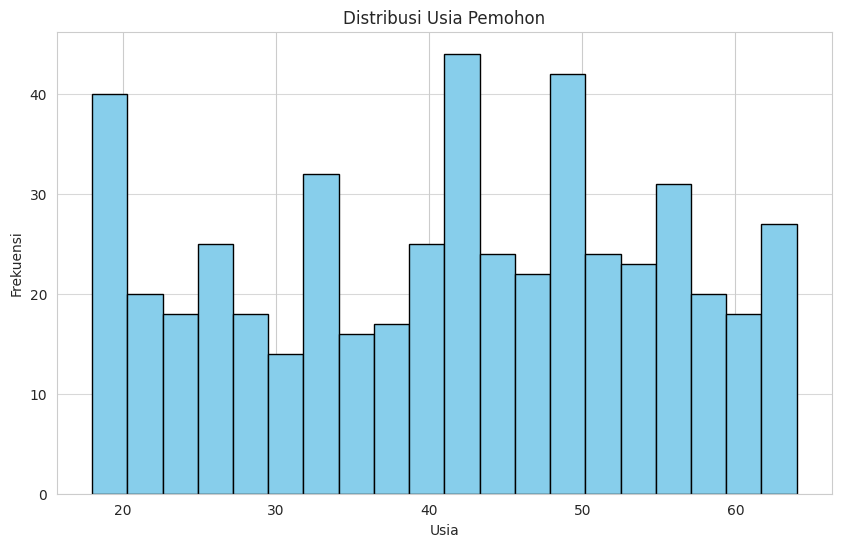

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Usia Pemohon')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.show()

Histogram di atas menunjukkan distribusi usia pemohon dalam sebuah dataset. Rentang usia pemohon berkisar antara 18 hingga 64 tahun, dengan variasi frekuensi di setiap kelompok usia. Terdapat beberapa puncak yang menunjukkan kelompok usia dengan jumlah pemohon lebih tinggi, terutama di sekitar usia 18-20 tahun, 40-an, dan 50-an. Sementara itu, rentang usia 30-an hingga awal 40-an memiliki jumlah pemohon yang relatif lebih sedikit. Distribusi ini menunjukkan bahwa tidak ada pola normal yang jelas, tetapi ada kecenderungan beberapa kelompok usia lebih dominan dalam pengajuan permohonan. Informasi ini dapat digunakan untuk analisis lebih lanjut, misalnya dalam memahami profil demografis pemohon yang lebih sering mengajukan pinjaman.

#### B. Hubungan Skor Kredit dengan Persetujuan Pinjaman

<ipython-input-6-685f192281bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Approval', y='Credit_Score', data=df, palette='Set2')


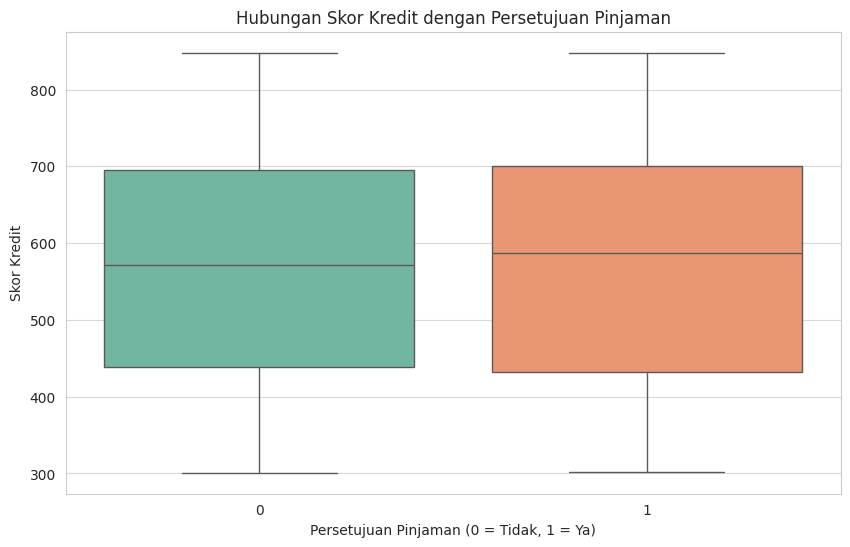

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Approval', y='Credit_Score', data=df, palette='Set2')
plt.title('Hubungan Skor Kredit dengan Persetujuan Pinjaman')
plt.xlabel('Persetujuan Pinjaman (0 = Tidak, 1 = Ya)')
plt.ylabel('Skor Kredit')
plt.grid(axis='y', alpha=0.75)
plt.show()

Boxplot di atas menggambarkan hubungan antara skor kredit dengan status persetujuan pinjaman. Sumbu X menunjukkan status persetujuan pinjaman, di mana 0 berarti pinjaman tidak disetujui dan 1 berarti pinjaman disetujui, sedangkan sumbu Y menunjukkan skor kredit pemohon. Dari diagram ini, terlihat bahwa distribusi skor kredit antara kedua kelompok relatif mirip, dengan rentang skor yang luas dari sekitar 300 hingga lebih dari 800. Median skor kredit untuk pemohon yang disetujui dan tidak disetujui berada di sekitar 600, menunjukkan bahwa skor kredit yang lebih tinggi umumnya dikaitkan dengan peluang persetujuan pinjaman yang lebih besar. Namun, terdapat variasi yang signifikan dalam kedua kelompok, dengan beberapa pemohon dengan skor rendah tetap mendapatkan persetujuan, serta beberapa pemohon dengan skor tinggi yang tidak disetujui. Hal ini menunjukkan bahwa selain skor kredit, faktor lain mungkin turut memengaruhi keputusan persetujuan pinjaman.

#### C. Pendapatan vs Jumlah Pinjaman

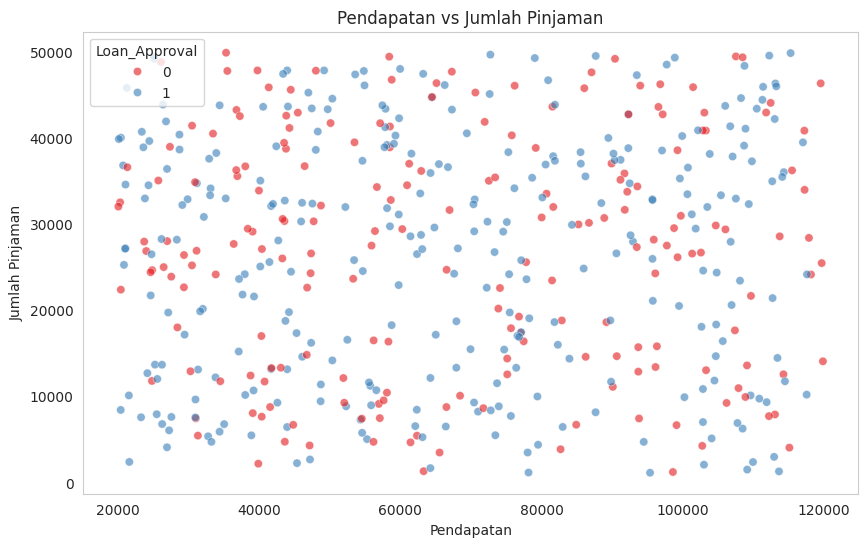

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Loan_Amount', data=df, hue='Loan_Approval', palette='Set1', alpha=0.6)
plt.title('Pendapatan vs Jumlah Pinjaman')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Pinjaman')
plt.grid()
plt.show()

Scatter plot di atas menunjukkan hubungan antara pendapatan pemohon dengan jumlah pinjaman yang diajukan, dengan warna yang membedakan status persetujuan pinjaman. Sumbu X merepresentasikan pendapatan pemohon, sementara sumbu Y menunjukkan jumlah pinjaman yang diajukan. Titik-titik berwarna biru mewakili pemohon yang pinjamannya disetujui (1), sedangkan titik merah menunjukkan pinjaman yang tidak disetujui (0). Dari pola distribusi, terlihat bahwa persetujuan pinjaman tidak bergantung secara langsung hanya pada pendapatan atau jumlah pinjaman. Pemohon dengan pendapatan tinggi masih bisa mengalami penolakan, dan sebaliknya, pemohon dengan pendapatan lebih rendah masih memiliki peluang mendapatkan persetujuan. Namun, ada kecenderungan bahwa pemohon dengan pendapatan lebih tinggi memiliki lebih banyak pinjaman yang disetujui. Hal ini menunjukkan bahwa selain pendapatan dan jumlah pinjaman, ada faktor lain yang turut memengaruhi keputusan persetujuan pinjaman.

#### D. Jumlah Pinjaman Berdasarkan Tujuan

<ipython-input-8-a6842d2ad75b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Purpose', y='Loan_Amount', data=average_loan_amount, palette='Set3')


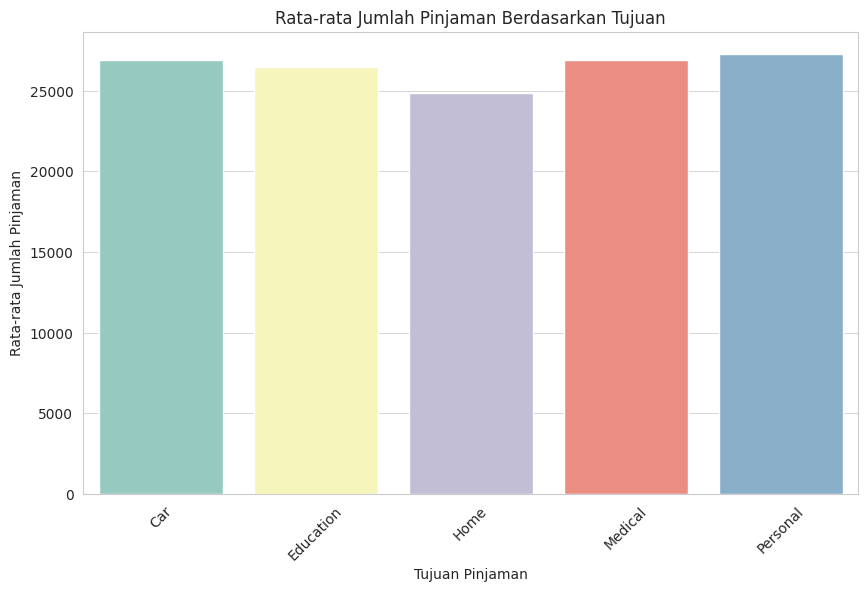

In [8]:
plt.figure(figsize=(10, 6))
average_loan_amount = df.groupby('Loan_Purpose')['Loan_Amount'].mean().reset_index()
sns.barplot(x='Loan_Purpose', y='Loan_Amount', data=average_loan_amount, palette='Set3')
plt.title('Rata-rata Jumlah Pinjaman Berdasarkan Tujuan')
plt.xlabel('Tujuan Pinjaman')
plt.ylabel('Rata-rata Jumlah Pinjaman')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

Grafik di atas menunjukkan rata-rata jumlah pinjaman berdasarkan tujuan pinjaman. Sumbu X merepresentasikan kategori tujuan pinjaman, yaitu Car (mobil), Education (pendidikan), Home (rumah), Medical (medis), dan Personal (pribadi). Sementara itu, sumbu Y menunjukkan rata-rata jumlah pinjaman yang diajukan untuk masing-masing kategori. Dari grafik, terlihat bahwa kategori Personal dan Medical memiliki rata-rata jumlah pinjaman tertinggi, diikuti oleh Car dan Education, sementara kategori Home memiliki rata-rata jumlah pinjaman yang sedikit lebih rendah dibanding kategori lainnya. Hal ini mengindikasikan bahwa pemohon cenderung mengajukan pinjaman dalam jumlah besar untuk keperluan pribadi dan medis, kemungkinan karena kebutuhan mendesak atau fleksibilitas penggunaan dana. Sementara itu, pinjaman untuk perumahan sedikit lebih rendah dalam rata-rata jumlahnya, yang mungkin menunjukkan bahwa pembiayaan rumah sering kali melibatkan sumber pendanaan lain atau skema pembiayaan khusus.

#### E. Tingkat Persetujuan Pinjaman Berdasarkan Tingkat Pendidikan

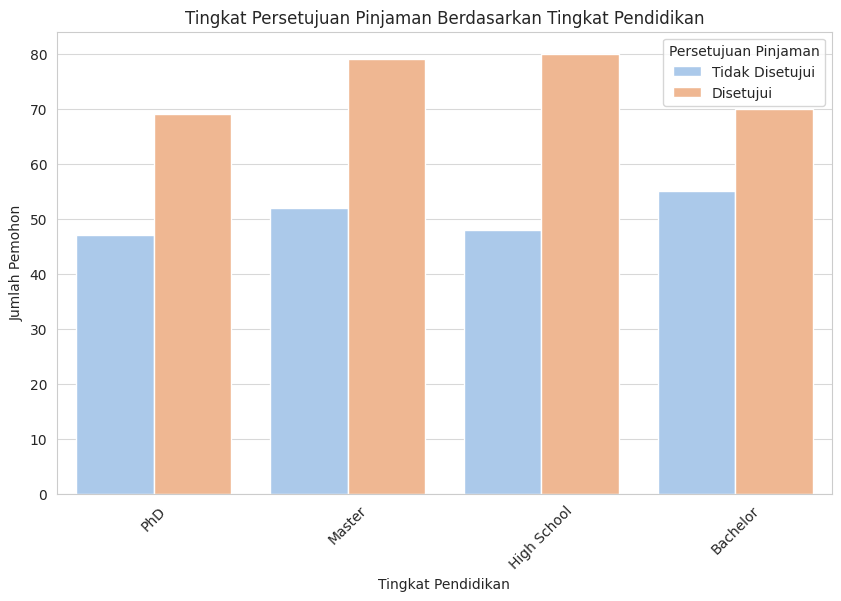

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Level', hue='Loan_Approval', data=df, palette='pastel')
plt.title('Tingkat Persetujuan Pinjaman Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Pemohon')
plt.xticks(rotation=45)
plt.legend(title='Persetujuan Pinjaman', labels=['Tidak Disetujui', 'Disetujui'])
plt.grid(axis='y', alpha=0.75)
plt.show()

Grafik di atas menunjukkan tingkat persetujuan pinjaman berdasarkan tingkat pendidikan pemohon. Sumbu X merepresentasikan tingkat pendidikan, yaitu PhD, Master, High School, dan Bachelor, sedangkan sumbu Y menunjukkan jumlah pemohon. Warna biru menunjukkan jumlah pemohon yang tidak disetujui, sementara warna oranye menunjukkan jumlah pemohon yang disetujui.

Dari grafik, terlihat bahwa pada setiap tingkat pendidikan, jumlah pinjaman yang disetujui lebih tinggi dibandingkan dengan yang tidak disetujui. Pemohon dengan tingkat pendidikan High School memiliki jumlah persetujuan pinjaman tertinggi, diikuti oleh Master dan Bachelor, sedangkan PhD memiliki jumlah pemohon yang relatif lebih sedikit tetapi tetap menunjukkan tingkat persetujuan yang tinggi. Hal ini dapat mengindikasikan bahwa tingkat pendidikan berkontribusi pada kemungkinan persetujuan pinjaman, tetapi bukan satu-satunya faktor penentu.

## **2. Pemrosesan Data**

### Encoding Fitur Kategorikal

In [10]:
label_encoder = preprocessing.LabelEncoder()

df[['Education_Level', 'Loan_Purpose']] = df[['Education_Level', 'Loan_Purpose']].apply(label_encoder.fit_transform)
df

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,3,333,26892,4,0
1,46,90588,2,316,26619,2,1
2,32,113610,3,452,1281,4,1
3,60,117856,1,677,28420,4,0
4,25,58304,3,641,16360,0,0
...,...,...,...,...,...,...,...
495,37,108236,1,455,44668,1,1
496,41,117579,0,666,24177,0,1
497,29,26469,3,550,25022,3,0
498,52,50105,1,633,41761,3,0


Pada output di atas, Label Encoding digunakan untuk mengonversi fitur kategorikal menjadi nilai numerik menggunakan `LabelEncoder()` dari `sklearn.preprocessing`.  

Fitur yang dikenakan Label Encoding adalah:  
1. `Education_Level` (Tingkat Pendidikan)
2. `Loan_Purpose` (Tujuan Pinjaman)

Sebelumnya, kedua fitur ini berbentuk kategori (teks), misalnya `Education_Level` berisi nilai seperti "Bachelor", "High School", "Master", "PhD", sedangkan `Loan_Purpose` berisi kategori seperti "Car", "Home", "Education", dll. Setelah diterapkan Label Encoding, nilai kategori ini diubah menjadi angka, misalnya:  
- "Bachelor" → `0`  
- "High School" → `1`
- "Master" → `2`  
- "PhD" → `3`  

Demikian pula, `Loan_Purpose` yang sebelumnya berupa kategori teks kini dikodekan menjadi angka (`0`, `1`, `2`, dll.).  

Tujuan dari Label Encoding adalah untuk mengonversi data kategorikal menjadi numerik agar dapat digunakan dalam algoritma machine learning yang tidak bisa bekerja langsung dengan data berbentuk teks.

### Feature Scaling Fitur Numerik

In [11]:
scaling = StandardScaler()

df[['Age', 'Income', 'Credit_Score', 'Loan_Amount']] = scaling.fit_transform(df[['Age', 'Income', 'Credit_Score', 'Loan_Amount']])

df

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,1.100655,-1.496205,3,-1.500286,0.026245,4,0
1,0.353029,0.809486,2,-1.606833,0.006629,2,1
2,-0.693647,1.606651,3,-0.754461,-1.813972,4,1
3,1.399705,1.753674,1,0.655712,0.136035,4,0
4,-1.216985,-0.308387,3,0.430084,-0.730507,0,0
...,...,...,...,...,...,...,...
495,-0.319834,1.420569,1,-0.735659,1.303496,1,1
496,-0.020784,1.744082,0,0.586770,-0.168835,0,1
497,-0.917935,-1.410713,3,-0.140253,-0.108120,3,0
498,0.801604,-0.592287,1,0.379945,1.094621,3,0


Pada output di atas, dilakukan Feature Scaling pada fitur numerik menggunakan `StandardScaler` dari `sklearn.preprocessing`.  

Fitur yang dikenakan Standard Scaling:  
1. `Age` (Usia)
2. `Income` (Pendapatan)
3. `Credit_Score` (Skor Kredit)
4. `Loan_Amount` (Jumlah Pinjaman)

Metode StandardScaler bekerja dengan mengubah setiap fitur agar memiliki rata-rata (mean) 0 dan standar deviasi 1, sehingga distribusi data menjadi lebih seimbang.

Dari hasil tabel, kita dapat melihat bahwa setelah scaling, nilai fitur numerik berubah menjadi nilai standar (z-score), dengan beberapa bernilai negatif, nol, atau positif tergantung pada seberapa jauh nilai aslinya dari rata-rata.  

Tujuan dari Feature Scaling adalah untuk memastikan bahwa fitur dengan skala yang berbeda (misalnya, `Income` yang besar vs `Credit_Score` yang kecil) tidak mendominasi model machine learning dan meningkatkan performa model yang sensitif terhadap skala data, seperti regresi linier, KNN, dan SVM.

### Data Training & Data Testing

In [12]:
X = df[['Age', 'Income', 'Education_Level', 'Credit_Score', 'Loan_Amount', 'Loan_Purpose']]
y = df['Loan_Approval']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
  )

Kode di atas membagi dataset menjadi data training (80) dan data testing (20%) menggunakan `train_test_split`.  

- X (Fitur): `Age`, `Income`, `Education_Level`, `Credit_Score`, `Loan_Amount`, `Loan_Purpose`.  
- y (Target): `Loan_Approval` (status persetujuan pinjaman).  

Tujuan dari pembagian ini adalah untuk melatih model dengan data training dan mengevaluasi performanya menggunakan data testing guna menghindari overfitting.

## **3. Pemilihan dan Training Model**

### Algoritma Machine Learning

In [13]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC()
}

Berikut lima algoritma Machine Learning yang saya pilih, beserta alasan pemilihannya:

1. Logistic Regression digunakan sebagai baseline karena sederhana, cepat, dan cocok untuk hubungan linear antara fitur dan target.  

1. Decision Tree dipilih karena mudah dipahami, tidak memerlukan feature scaling, dan dapat menangani data non-linear, meskipun rentan terhadap overfitting.  

1. Random Forest digunakan karena lebih stabil dan akurat dibanding Decision Tree, serta lebih tahan terhadap overfitting dengan metode ensemble.  

1. XGBoost dipilih karena lebih cepat dan akurat, mampu menangani outlier dan missing values, tetapi memerlukan tuning hyperparameter.  

1. SVM digunakan karena efektif untuk data berdimensi tinggi dan non-linear, tetapi kurang efisien pada dataset besar.

### Training Dataset

In [14]:
evaluation_results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Simpan hasil dalam daftar
    evaluation_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

In [15]:
evaluation_results

[{'Model': 'Logistic Regression',
  'Accuracy': 0.64,
  'Precision': 0.6363636363636364,
  'Recall': 1.0,
  'F1 Score': 0.7777777777777778},
 {'Model': 'Decision Tree',
  'Accuracy': 0.6,
  'Precision': 0.7090909090909091,
  'Recall': 0.6190476190476191,
  'F1 Score': 0.6610169491525424},
 {'Model': 'Random Forest',
  'Accuracy': 0.55,
  'Precision': 0.640625,
  'Recall': 0.6507936507936508,
  'F1 Score': 0.6456692913385826},
 {'Model': 'XGBoost',
  'Accuracy': 0.56,
  'Precision': 0.6666666666666666,
  'Recall': 0.6031746031746031,
  'F1 Score': 0.6333333333333333},
 {'Model': 'SVM',
  'Accuracy': 0.63,
  'Precision': 0.63,
  'Recall': 1.0,
  'F1 Score': 0.7730061349693251}]

Kode tersebut melakukan proses pelatihan dan evaluasi beberapa model machine learning dengan menggunakan data pelatihan (`X_train`, `y_train`) dan data uji (`X_test`, `y_test`). Dalam prosesnya, setiap model dalam dictionary `models` dilatih menggunakan metode `.fit()`, kemudian melakukan prediksi terhadap data uji dengan `.predict()`.  

Setelah mendapatkan hasil prediksi, model dievaluasi menggunakan beberapa metrik performa, yaitu accuracy (akurasi), precision (presisi), recall, dan F1-score. Nilai dari setiap metrik tersebut dihitung dengan membandingkan hasil prediksi dengan nilai sebenarnya (`y_test`).  

Hasil evaluasi dari masing-masing model kemudian disimpan dalam daftar `evaluation_results`, yang berisi nama model serta skor dari masing-masing metrik evaluasi. Data ini dapat digunakan untuk membandingkan performa berbagai model dan memilih yang terbaik.

## **4. Evaluasi Model**

### Metric Evaluasi Model

In [16]:
results_df = pd.DataFrame(evaluation_results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression      0.64   0.636364  1.000000  0.777778
1        Decision Tree      0.60   0.709091  0.619048  0.661017
2        Random Forest      0.55   0.640625  0.650794  0.645669
3              XGBoost      0.56   0.666667  0.603175  0.633333
4                  SVM      0.63   0.630000  1.000000  0.773006


Output tersebut menampilkan hasil evaluasi berbagai model machine learning berdasarkan metrik Accuracy, Precision, Recall, dan F1 Score. Dari hasil evaluasi dapat dsimpulkan:

* Logistic Regression dan SVM memiliki Recall tertinggi (1.0), menunjukkan bahwa model ini sangat baik dalam mendeteksi kelas positif.
* Logistic Regression memiliki F1 Score tertinggi (0.7778), diikuti oleh SVM (0.7730), yang menunjukkan keseimbangan antara Precision dan Recall.
* Decision Tree dan Random Forest memiliki nilai akurasi lebih rendah dibandingkan model lainnya.
* XGBoost memiliki Precision tertinggi (0.6667), tetapi F1 Score-nya lebih rendah dari Logistic Regression dan SVM.

### Model Terbaik

Berdasarkan hasil evaluasi, model terbaik dapat ditentukan dengan melihat F1 Score, karena F1 Score merupakan metrik yang menyeimbangkan Precision dan Recall.

Model dengan F1 Score tertinggi adalah Logistic Regression (0.7778), diikuti oleh SVM (0.7730). Sehingga Logistic Regression adalah model terbaik berdasarkan evaluasi ini, karena memiliki keseimbangan terbaik antara Precision dan Recall.

## **5. Tuning Model dengan Grid Search atau Random Search**

### Tuning Model

In [17]:
# Mendefinisikan parameter grid untuk hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 5000]
}

# Menggunakan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Melatih model dengan data latih
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 2500, 5000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

Hyperparameter tuning menggunakan GridSearchCV untuk model Logistic Regression digunakan untuk mencari kombinasi hyperparameter terbaik. Hyperparameter yang diuji:

* C (regularization strength): [0.001, 0.01, 0.1, 1, 10, 100]
* solver (metode optimasi): ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
* max_iter (jumlah iterasi): [100, 1000, 2500, 5000]

GridSearchCV melakukan 5-fold cross-validation untuk mencari kombinasi parameter terbaik, dengan total 600 model diuji (120 kombinasi x 5 fold).

### Kombinasi Hyperparameter Terbaik

In [18]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.001, 'max_iter': 100, 'solver': 'liblinear'}


Hasil pencarian hyperparameter terbaik menunjukkan bahwa kombinasi optimal untuk Logistic Regression adalah C = 0.001, max_iter = 100, dan solver = 'liblinear', yang memberikan performa terbaik berdasarkan evaluasi model.

## **6. Perbandingan Performa Sebelum dan Sesudah Tuning**

### Hasil Evaluasi Sebelum dan Sesudah Tuning

In [19]:
# Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

evaluation_results.append({
    'Model': 'Logistic Regression AT',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Menampilkan hasil evaluasi untuk model yang diinginkan
filtered_results = []

for result in evaluation_results:
    if result['Model'] in ('Logistic Regression', 'Logistic Regression AT'):
        filtered_results.append(result)

results_df = pd.DataFrame(filtered_results)
print(results_df)

                    Model  Accuracy  Precision  Recall  F1 Score
0     Logistic Regression      0.64   0.636364     1.0  0.777778
1  Logistic Regression AT      0.64   0.636364     1.0  0.777778


### Kesimpulan Setelah Tuning

Hasil evaluasi menunjukkan bahwa Logistic Regression sebelum dan sesudah hyperparameter tuning (AT) memiliki performa yang sama. Nilai accuracy (0.64), precision (0.636364), recall (1.0), dan F1 score (0.777778) tidak berubah setelah tuning, menandakan bahwa optimasi hyperparameter tidak memberikan peningkatan signifikan pada model.